# Objective:

In this Project, by using the Kaggle's dataset on Heart Disease, we will be examining the cause and affect of using the given condition in the data set. Furthermore, by using the data and given conditions, we will make prediction using different models and draw conclusion from the program's prediction

# Data Analyze:

The dataset that we will be using was acquired from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

First we are going to import the library that we will be using into the program

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


There are 14 attributes that was provided in the dataset: 

**age**: The age of subject in year

**sex**: Gender of subject (1 = male, 0 = female)

**cp**: The chest pain experienced (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: result from thallium scan (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

The name of each attribute is a little confusing, so changes must be made 

In [2]:
data.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'chol', 'fasting_blood_sugar', 
                'rest_ecg','maximum_heart_rate', 'exercise_induced_angina', 'st_depression_induced', 'st_slope', 
                'num_major_vessel', 'thal_res', 'is_heart_diseased']
data.head(10)

,age,gender,chest_pain_type,resting_blood_pressure,chol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,st_depression_induced,st_slope,num_major_vessel,thal_res,is_heart_diseased
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


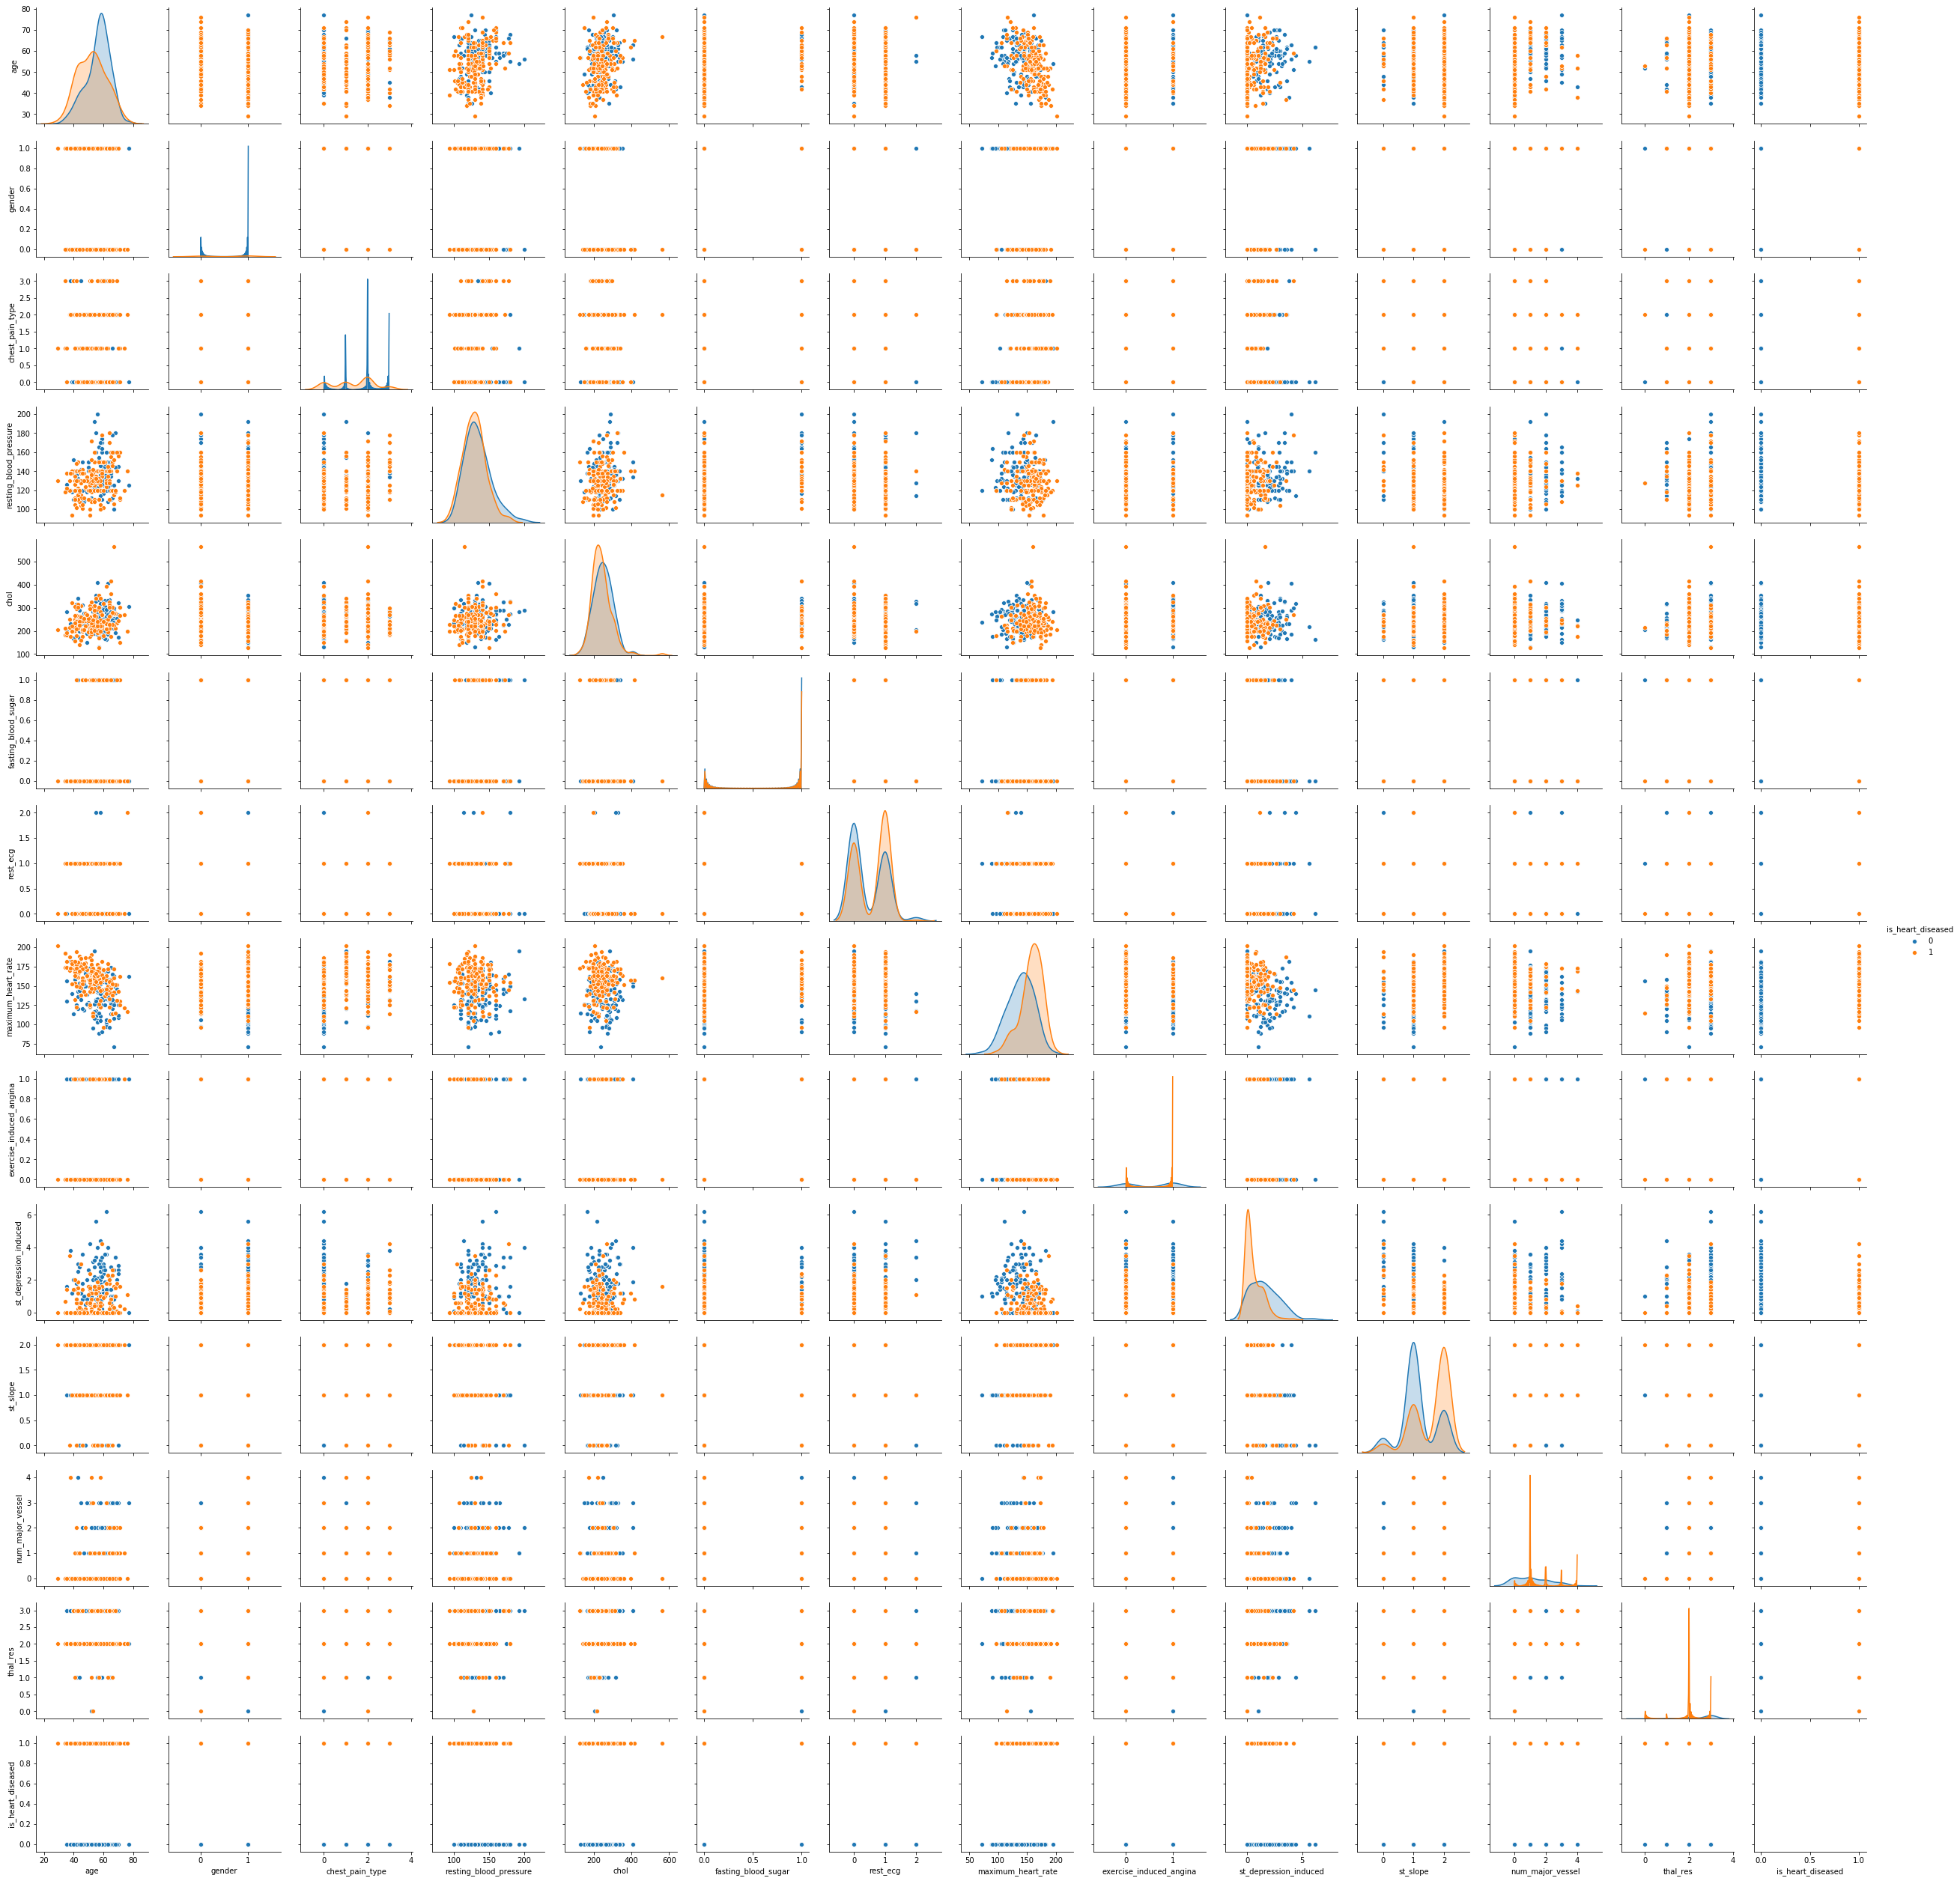

In [3]:
sns.pairplot(data, hue='is_heart_diseased')

Let's take a look at some attribute comparing to if that person is having a heart disease.

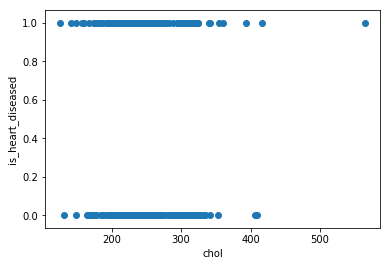

In [16]:
plotdat = data[['chol','is_heart_diseased']]

plt.scatter( 'chol', 'is_heart_diseased', data= plotdat, marker='o')
plt.xlabel('chol')
plt.ylabel('is_heart_diseased')
plt.show()

From the plot above, we can see that the cholesterol level of people with heart diseases are higher than normal people. But let's examine other attributes as well.

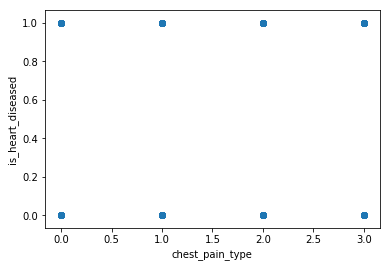

In [5]:
plotdat = data[['chest_pain_type','is_heart_diseased']]
plt.scatter( 'chest_pain_type', 'is_heart_diseased', data= plotdat, marker='o')
plt.xlabel('chest_pain_type')
plt.ylabel('is_heart_diseased')
plt.show()

The above graph is the type of pain compare to if the person is having a heart disease or not.

It's a little unclear since all values are pointed to the same value. Let's examine others values.

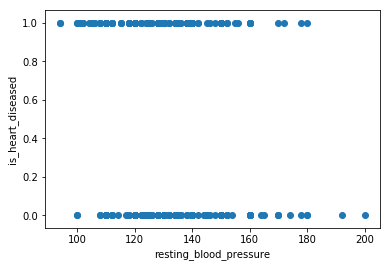

In [6]:
plotdat = data[['resting_blood_pressure','is_heart_diseased']]
plt.scatter( 'resting_blood_pressure', 'is_heart_diseased', data= plotdat, marker='o')
plt.xlabel('resting_blood_pressure')
plt.ylabel('is_heart_diseased')
plt.show()

We can see from the above graph that people with heart disease usually have a lower blood pressure than normal healthy people.

Next, we will be examine how age will affect the heart condition. But first we have to filter out the data to get the values that we need.

In [35]:
isHeartDiseased = data[data['is_heart_diseased'] == 0]
younger = isHeartDiseased[isHeartDiseased['age'] <40]['age'].count()
between40and50 = isHeartDiseased[(isHeartDiseased['age'] < 50) & (isHeartDiseased['age'] >=40)]['age'].count()
between50and60 = isHeartDiseased['age'][(isHeartDiseased['age'] >50) & (isHeartDiseased['age']<=60)].count()
older = isHeartDiseased['age'][isHeartDiseased['age'] > 60].count()


Text(0.5, 1.0, 'Amount of people got heart diseased with age')

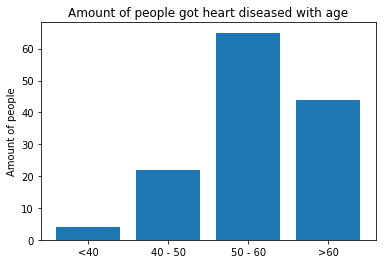

In [38]:
x = np.arange(4)
plt.bar(x, [younger, between40and50, between50and60, older])
plt.xticks(x, ['<40', '40 - 50', '50 - 60', '>60']);
plt.ylabel("Amount of people")
plt.title('Amount of people got heart diseased with age')

As we look at the plot above, we can see that most people got heart disease diagnosed fall in age between 50 to 60. Second is when they are above 60 years of age.

# Model Selection:

There are multiple model that we can use to predict data but what is the most efficient to use for this type of data?

Since this is multiple events that leads to an events, we can use Bayesian theory which predict using prior events and with Naive Bayes, we also takes in the likelihood of that event.

# Multinomial Naive Bayes


In [42]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

y = data['is_heart_diseased'];
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('is_heart_diseased',1), y, test_size=0.2, random_state = 42)

model = make_pipeline(FunctionTransformer(), MultinomialNB())

model.fit(X_train, Y_train)

y_model = model.predict(X_test)


Let's perform test for this model

In [43]:
accuracy_score(Y_test, y_model)

0.8524590163934426

In [44]:
print("Train accuracy is %.2f %%" % (model.score(X_train, Y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, Y_test)*100))

Train accuracy is 73.97 %
Test accuracy is 85.25 %


We can see that the accuracy test of our model is 85%. So we tried to increase this value by using the next model which is the Random Forest.

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(FunctionTransformer(),RandomForestClassifier(max_depth = 5))

Then we make prediction and check its accuracy

In [46]:
y = data['is_heart_diseased'];

model.fit(X_train, Y_train)
y_model = model.predict(X_test)

print(accuracy_score(Y_test, y_model))

print("Train accuracy is %.2f %%" % (model.score(X_train, Y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, Y_test)*100))



0.8852459016393442
Train accuracy is 93.39 %
Test accuracy is 88.52 %


But let's see if we can improve the percentage by using other classifier. 

Next, we will examine other classification method like SVM, decision tree and K-neighbors

# SVM:

In [39]:
from sklearn.svm import SVC

model = make_pipeline(FunctionTransformer(),SVC())
model.fit(X_train,Y_train)

y_model = model.predict(X_test)


print(accuracy_score(Y_test, y_model))

print("Train accuracy is %.2f %%" % (model.score(X_train, Y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, Y_test)*100))

0.5409836065573771
Train accuracy is 100.00 %
Test accuracy is 54.10 %


# Decision Tree:

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(FunctionTransformer(),DecisionTreeClassifier())
model.fit(X_train, Y_train)

y_model = model.predict(X_test)


print(accuracy_score(Y_test, y_model))

print("Train accuracy is %.2f %%" % (model.score(X_train, Y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, Y_test)*100))

0.7868852459016393
Train accuracy is 100.00 %
Test accuracy is 78.69 %


# K-Neighbors:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(FunctionTransformer(), KNeighborsClassifier())
model.fit(X_train, Y_train)

y_model = model.predict(X_test)


print(accuracy_score(Y_test, y_model))

print("Train accuracy is %.2f %%" % (model.score(X_train, Y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, Y_test)*100))

0.6885245901639344
Train accuracy is 76.03 %
Test accuracy is 68.85 %


# Conclusion:

From the above result, we can see that Random Forest Classifier produce a higher and reasonable accuracy result compares to the others models. Therefore, we conclude that for this particular dataset, when it comes to prediction, Random Forest Classifier should be used.

# Future Direction:

For future direction, use a better model to increase the prediction accuracy is a must.

For the program to be put to use, its accuracy should be higher than 90%

# Reference:

https://www.kaggle.com/ronitf/heart-disease-uci